<a href="https://colab.research.google.com/github/gayatri-bagusetty-34/Deep-Learning/blob/main/Autoencoder.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
(x_train, _), (x_test, _) = tf.keras.datasets.fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


**Normalization benefits**

Improve training stability.

Speed up convergence.

Prevent large weight updates.


**Flatten the images** is required because Dense (fully connected) layers expect 1D input.


In [ ]:
# Normalize images to [0,1] range
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten images (28x28 → 784)
x_train = x_train.reshape((x_train.shape[0], 784))
x_test = x_test.reshape((x_test.shape[0], 784))

# Define encoding dimension
encoding_dim = 32   # This defines the bottleneck size in the autoencoder.

In [ ]:
# Encoder
input_img = Input(shape=(784,))
encoded = Dense(128, activation='relu')(input_img)
encoded = Dense(encoding_dim, activation='relu')(encoded)

In [ ]:
# Decoder
decoded = Dense(128, activation='relu')(encoded)
decoded = Dense(784, activation='sigmoid')(decoded)

In [ ]:
# Autoencoder model (Encoder + Decoder)
autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='mse')

In [ ]:
# Train the autoencoder
autoencoder.fit(x_train, x_train, epochs=20, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Encode & decode some test images
decoded_imgs = autoencoder.predict(x_test)

Epoch 1/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 18ms/step - loss: 0.0733 - val_loss: 0.0235
Epoch 2/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0221 - val_loss: 0.0192
Epoch 3/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0186 - val_loss: 0.0173
Epoch 4/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 8s 23ms/step - loss: 0.0167 - val_loss: 0.0162
Epoch 5/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0156 - val_loss: 0.0151
Epoch 6/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - loss: 0.0147 - val_loss: 0.0149
Epoch 7/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 17ms/step - loss: 0.0140 - val_loss: 0.0139
Epoch 8/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 0.0136 - val_loss: 0.0133
Epoch 9/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0131 - val_loss: 0.0129
Epoch 10/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - loss: 0.0127 - val_loss: 0.0128
Epoch 11/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0125 - val_loss: 0.0124
Epoch 12/20
235/235 ━━━━━━━━━━━━━━━━━━━━ 

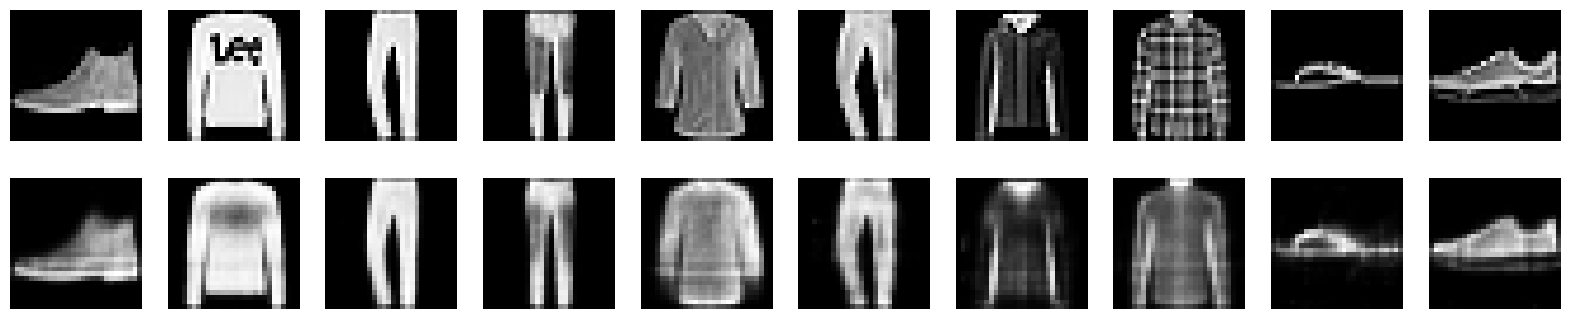

In [ ]:
# Visualizing Original vs. Reconstructed images
n = 10  # Show 10 images
plt.figure(figsize=(20, 4))
for i in range(n):
    # Original Image
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap="gray")
    plt.axis("off")

    # Reconstructed Image
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28), cmap="gray")
    plt.axis("off")
plt.show()